In [126]:
import numpy as np

np.random.seed(0)
# Define the function f(x)
def f(x):
    if x < 1/8:
        return 0
    elif 1/8 <= x < 5/8:
        return 1
    elif 5/8 <= x < 7/8:
        return 2
    else:
        return 3

# Generate M = 10,000 samples of U ~ Uniform[0, 1]
M = 10000
U = np.random.uniform(0, 1, M)

# Compute f(U) for each sample
X = np.array([f(u) for u in U])

# Calculate empirical mean and sample variance
empirical_mean = np.mean(X)
sample_variance = np.var(X, ddof=1)

# Theoretical mean and variance calculations
# Probabilities of each value: P(X=0), P(X=1), P(X=2), P(X=3)
p_0 = 1/8
p_1 = 4/8
p_2 = 2/8
p_3 = 1/8

# Expected value
theoretical_mean = (0 * p_0) + (1 * p_1) + (2 * p_2) + (3 * p_3)

# Variance
theoretical_variance = (
    (0**2 * p_0) + (1**2 * p_1) + (2**2 * p_2) + (3**2 * p_3) - theoretical_mean**2
)

(empirical_mean, sample_variance, theoretical_mean, theoretical_variance)


(np.float64(1.365), np.float64(0.7418491849184917), 1.375, 0.734375)

## Ex2

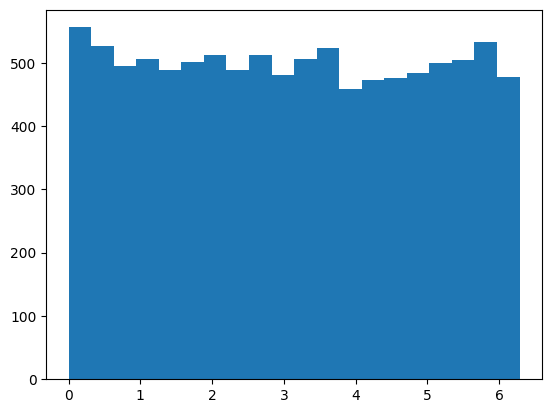

In [127]:
M=10000
U = np.random.uniform(0, 1, M)
V = [2 *np.pi* u for u in U]

import matplotlib.pyplot as plt
plt.hist(V, bins=20)
plt.show()

In [128]:
empirical_mean = np.mean(V)
sample_variance = np.var(V, ddof=1)
theoretical_mean = np.pi
theoretical_variance = np.pi**2/3


empirical_mean  =round(empirical_mean, 3)
sample_variance = round(sample_variance, 3)
theoretical_mean= round(theoretical_mean, 3)
theoretical_variance = round(theoretical_variance, 3)

In [129]:
print(f"The theoretical mean is {theoretical_mean} and theoretical variance is around {theoretical_variance}. The empirical mean is around {empirical_mean} and sample variance is around {sample_variance}.")

The theoretical mean is 3.142 and theoretical variance is around 3.29. The empirical mean is around 3.112 and sample variance is around 3.35.


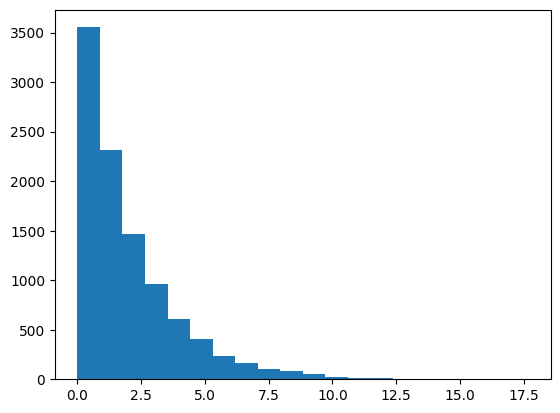

In [130]:
M=10000
U = np.random.uniform(0, 1, M)
V = [-2*np.log(1-u) for u in U]

plt.hist(V, bins=20)
plt.show()

In [131]:
empirical_mean = np.mean(V)
sample_variance = np.var(V, ddof=1)
theoretical_mean = 2
theoretical_variance = 4


empirical_mean  =round(empirical_mean, 3)
sample_variance = round(sample_variance, 3)
theoretical_mean= round(theoretical_mean, 3)
theoretical_variance = round(theoretical_variance, 3)

print(f"The theoretical mean is {theoretical_mean} and theoretical variance is around {theoretical_variance}. The empirical mean is around {empirical_mean} and sample variance is around {sample_variance}.")

The theoretical mean is 2 and theoretical variance is around 4. The empirical mean is around 2.006 and sample variance is around 4.041.


## Ex3

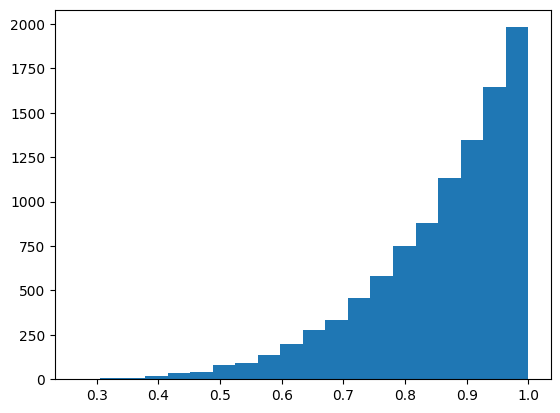

In [132]:
M=10000
U = np.random.uniform(0, 1, M)
V = [np.power(u,1/6) for u in U]

plt.hist(V, bins=20)
plt.show()

In [133]:
empirical_mean = np.mean(V)
sample_variance = np.var(V, ddof=1)
theoretical_mean = 6/7
theoretical_variance = 3/196


empirical_mean = round(empirical_mean, 3)
sample_variance = round(sample_variance, 4)
theoretical_mean= round(theoretical_mean, 3)
theoretical_variance = round(theoretical_variance, 4)

In [134]:
print(f"The theoretical mean is {theoretical_mean} and theoretical variance is around {theoretical_variance}. The empirical mean is around {empirical_mean} and sample variance is around {sample_variance}.")

The theoretical mean is 0.857 and theoretical variance is around 0.0153. The empirical mean is around 0.857 and sample variance is around 0.0147.


## Ex4

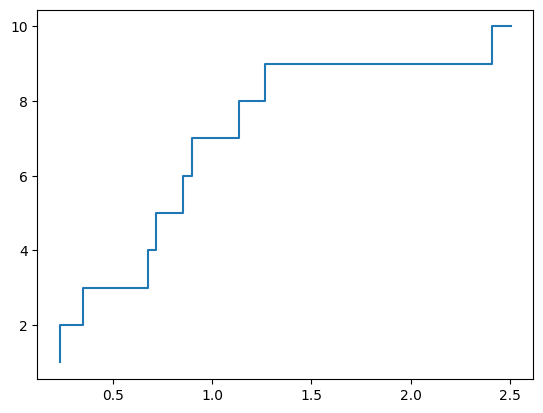

In [135]:
X= np.random.exponential(0.5, 10) # scale = 1/lambda
#draw trajectory of poisson process with X
times = np.cumsum(X)
plt.step(times, range(1, len(times)+1))

In [136]:
def generateN1():
    N = 0
    t = 0
    while t < 1:
        t += np.random.exponential(0.5)
        if t < 1:
            N += 1
    return N

N=[generateN1() for _ in range(10000)]

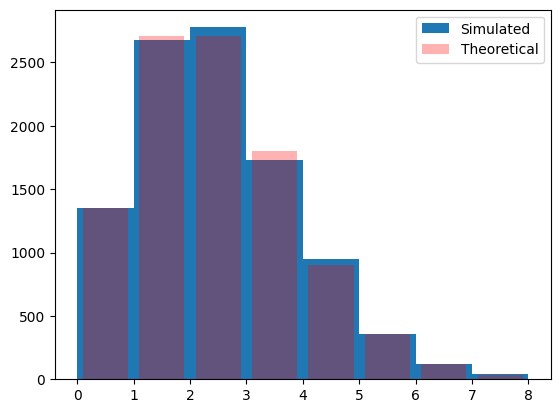

In [137]:
import math
plt.hist(N, bins=8)
# draw e^(-2)2^k/k! for k=0,1,2,3,4,5,6,7
k = np.arange(8)
poisson_prob = np.exp(-2) * 2**k / np.array([math.factorial(i) for i in k]) * 10000
plt.bar(k+0.5,poisson_prob,color='r',alpha=0.3) #shift the bar to the right by 0.5
plt.legend(['Simulated','Theoretical'])
plt.show()

In [138]:
empirical_mean = np.mean(N)
sample_variance = np.var(N, ddof=1)
theoretical_mean = 2
theoretical_variance = 2


empirical_mean = round(empirical_mean, 3)
sample_variance = round(sample_variance, 3)
theoretical_mean= round(theoretical_mean, 3)
theoretical_variance = round(theoretical_variance, 3)

In [139]:
print(f"The theoretical mean is {theoretical_mean} and theoretical variance is {theoretical_variance}. The empirical mean is around {empirical_mean} and sample variance is around {sample_variance}.")

The theoretical mean is 2 and theoretical variance is 2. The empirical mean is around 2.002 and sample variance is around 1.989.


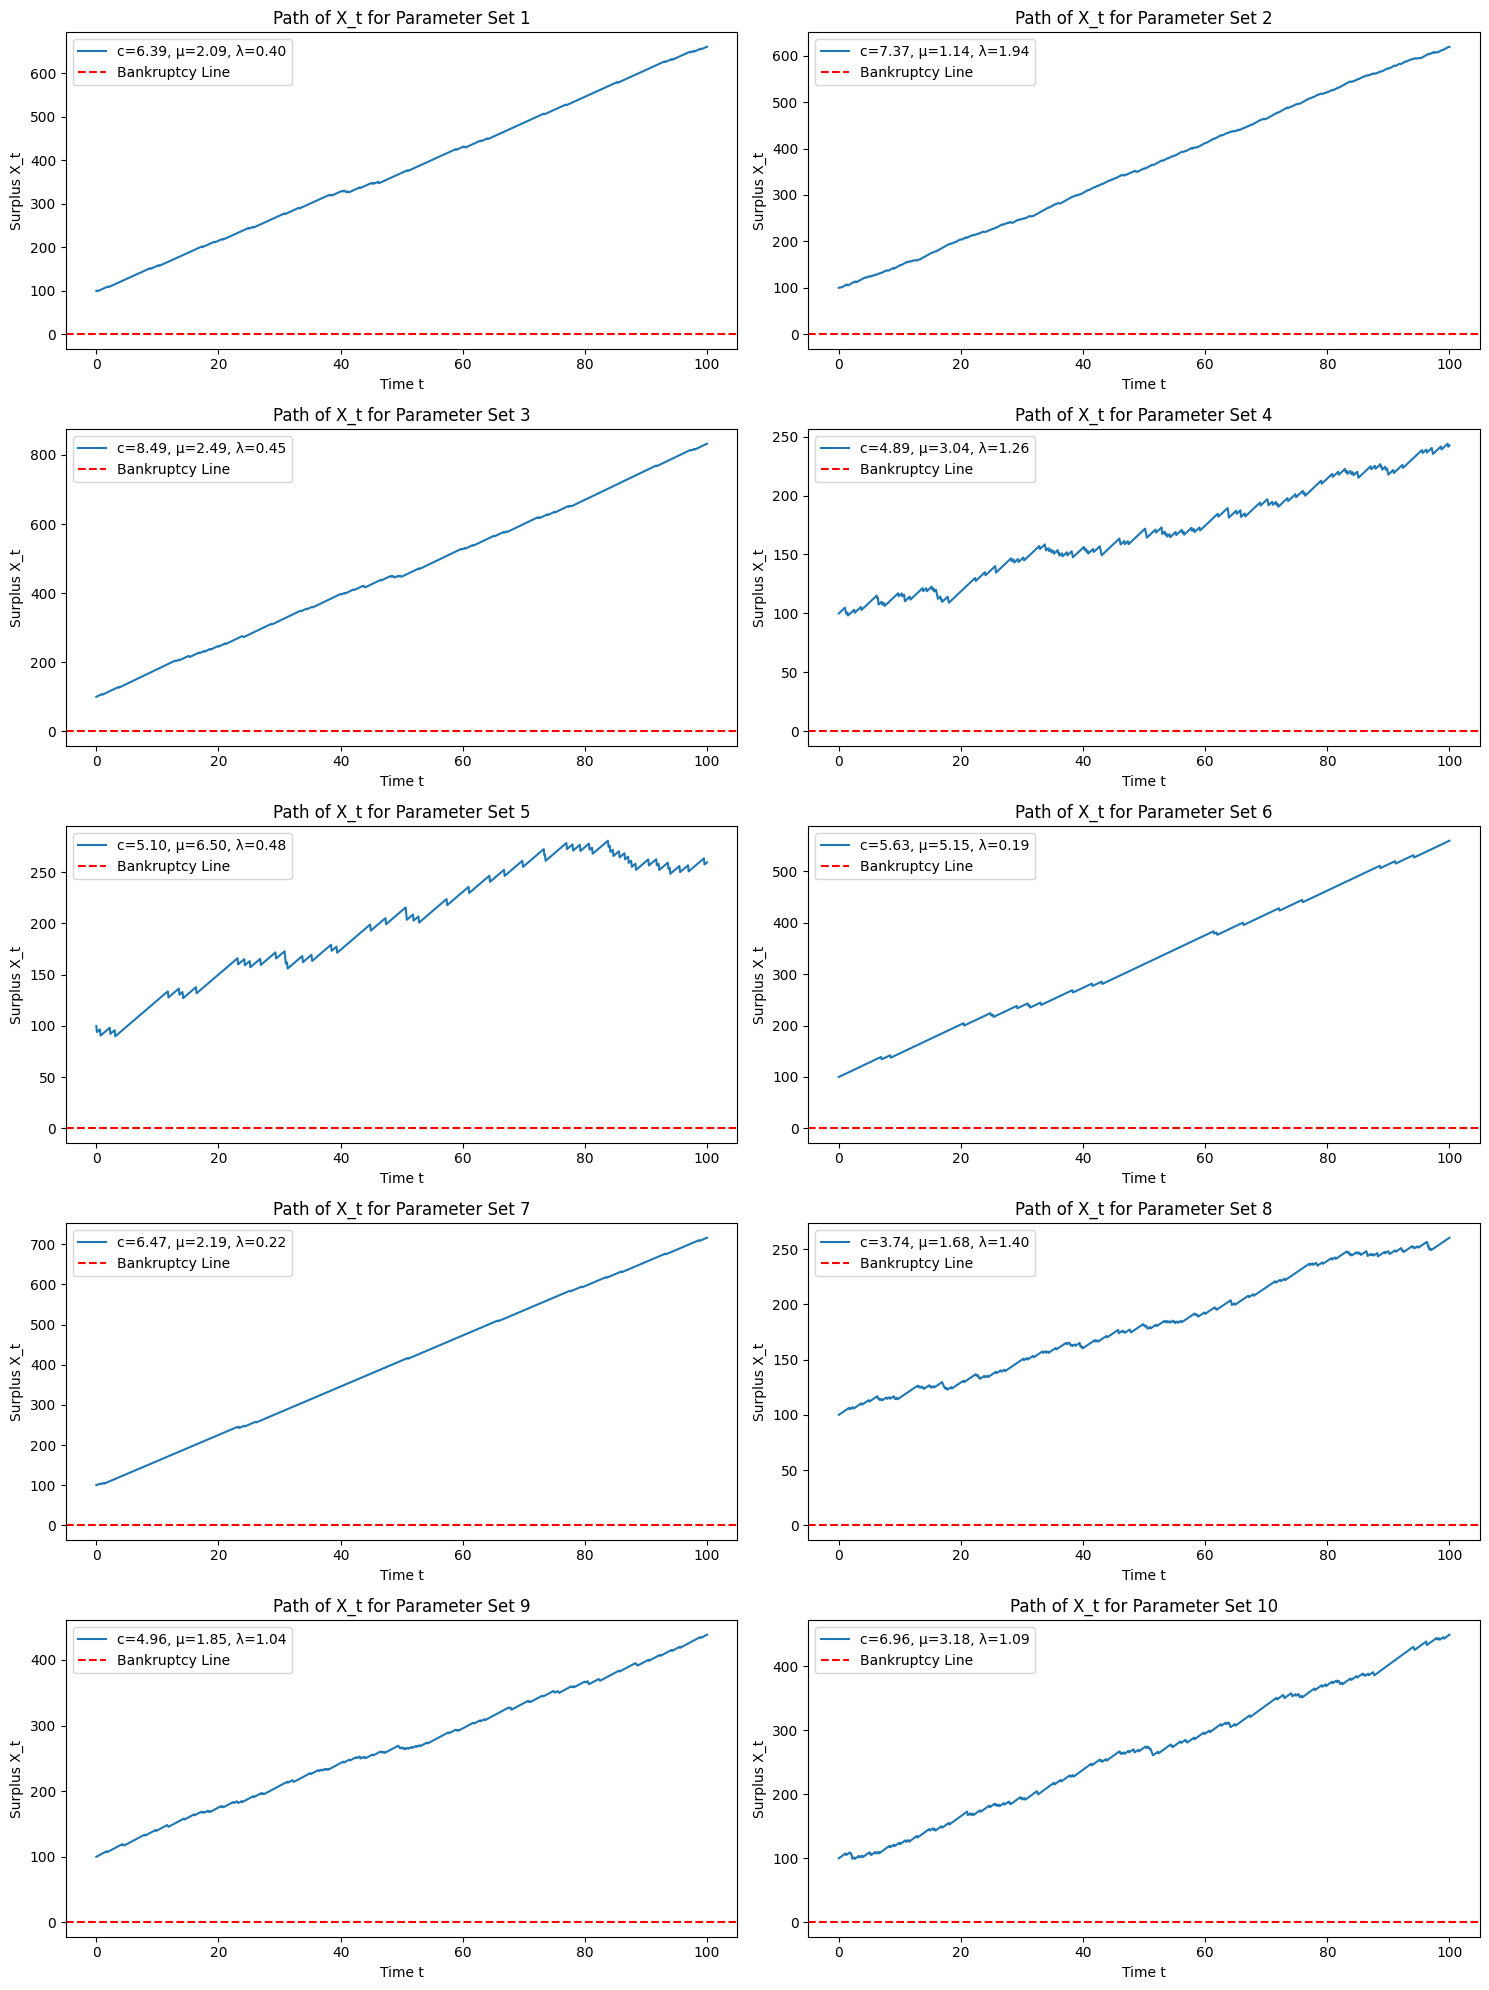

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10 sets of parameters (c, μ, λ) such that c - λμ > 0
np.random.seed(42)  # For reproducibility
parameters = []
while len(parameters) < 10:
    c = np.random.uniform(1, 10)
    μ = np.random.uniform(1, 8)
    λ = np.random.uniform(0.1, 2)
    if c - λ * μ > 0:
        parameters.append((c, μ, λ))

# Simulate one path of the process for each set of parameters
x = 100  # Initial wealth
T = 100  # Time horizon
n_points = 1000  # Number of points for simulation
time = np.linspace(0, T, n_points)

fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()

for i, (c, μ, λ) in enumerate(parameters):
    # Simulate Poisson process N_t
    dt = T / n_points
    increments = np.random.poisson(λ * dt, n_points)
    N_t = np.cumsum(increments)

    # Calculate X_t = x + ct - μN_t
    X_t = x + c * time - μ * N_t

    # Plot the path
    axs[i].plot(time, X_t, label=f"c={c:.2f}, μ={μ:.2f}, λ={λ:.2f}")
    axs[i].axhline(0, color='red', linestyle='--', label="Bankruptcy Line")
    axs[i].set_title(f"Path of X_t for Parameter Set {i+1}")
    axs[i].set_xlabel("Time t")
    axs[i].set_ylabel("Surplus X_t")
    axs[i].legend()

plt.tight_layout()
plt.show()


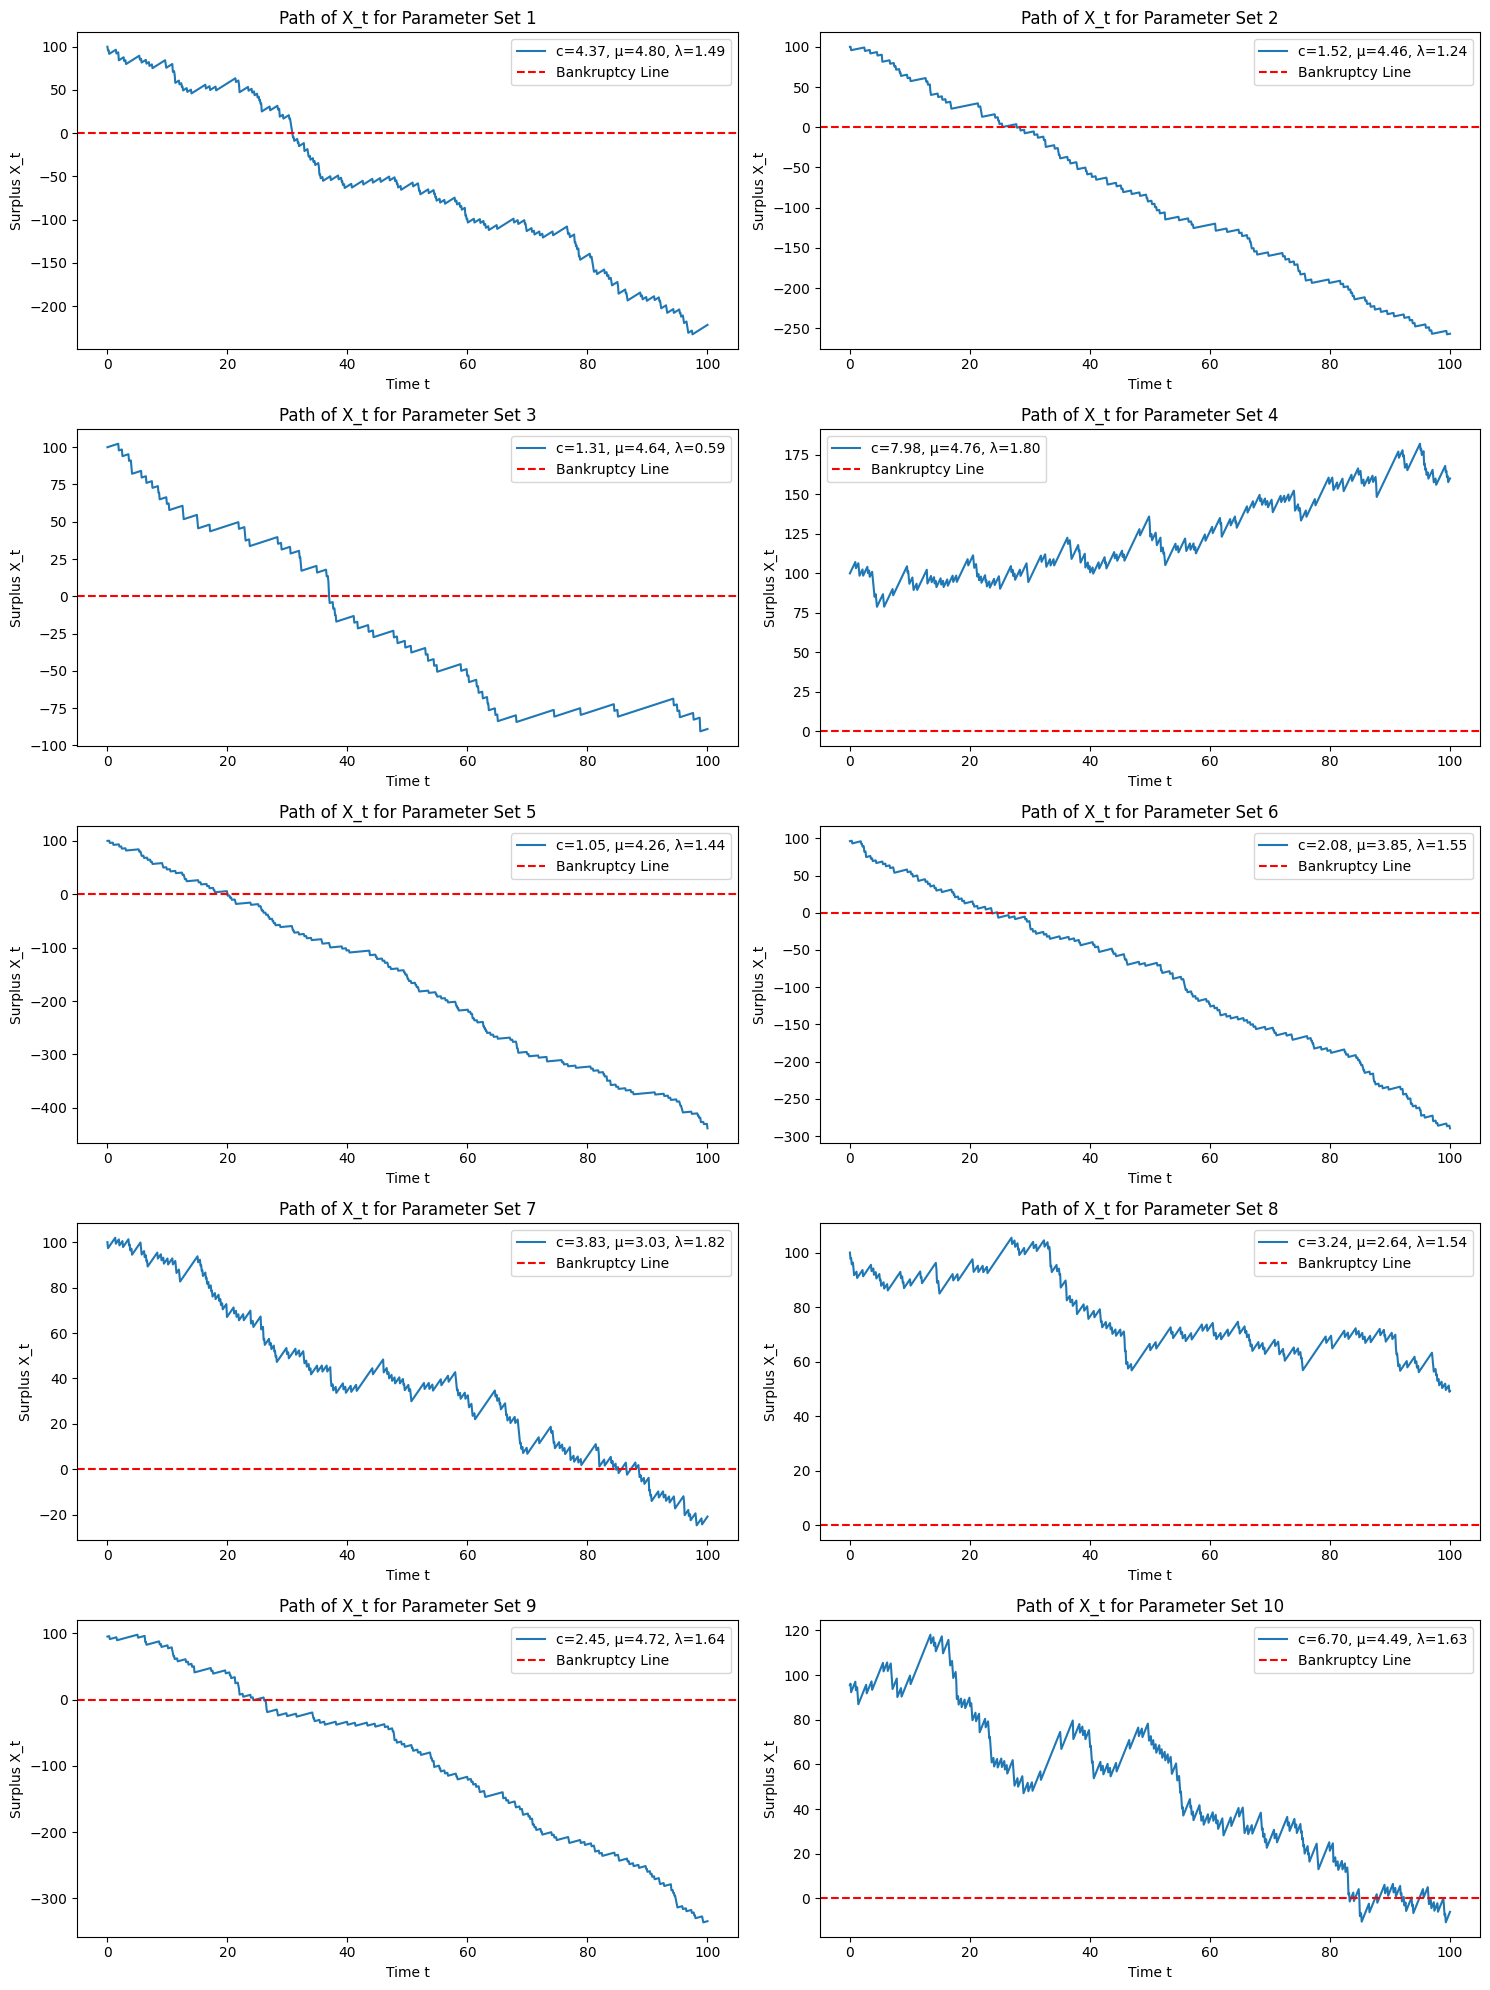

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 10 sets of parameters (c, μ, λ) such that c - λμ > 0
np.random.seed(42)  # For reproducibility
parameters = []
while len(parameters) < 10:
    c = np.random.uniform(1, 10)
    μ = np.random.uniform(1, 5)
    λ = np.random.uniform(0.1, 2)
    if c - λ * μ < 0:
        parameters.append((c, μ, λ))

# Simulate one path of the process for each set of parameters
x = 100  # Initial wealth
T = 100  # Time horizon
n_points = 1000  # Number of points for simulation
time = np.linspace(0, T, n_points)

fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()

for i, (c, μ, λ) in enumerate(parameters):
    # Simulate Poisson process N_t
    dt = T / n_points
    increments = np.random.poisson(λ * dt, n_points)
    N_t = np.cumsum(increments)

    # Calculate X_t = x + ct - μN_t
    X_t = x + c * time - μ * N_t

    # Plot the path
    axs[i].plot(time, X_t, label=f"c={c:.2f}, μ={μ:.2f}, λ={λ:.2f}")
    axs[i].axhline(0, color='red', linestyle='--', label="Bankruptcy Line")
    axs[i].set_title(f"Path of X_t for Parameter Set {i+1}")
    axs[i].set_xlabel("Time t")
    axs[i].set_ylabel("Surplus X_t")
    axs[i].legend()

plt.tight_layout()
plt.show()
